# Q Estimation - Spectral ratio

## Import Modules

In [606]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

## Load in Trace data

In [607]:
data = np.loadtxt(fname = 'Syn Traces/RickerConstQNoNoise100.txt')
time =np.loadtxt(fname = '4s0.004time.txt')
#data = np.loadtxt(fname = 'RandSyn.txt')
#t = np.loadtxt(fname = 'timw.txt')

## Sense Trace Parameters

In [608]:
# Sample Rate
dt = round(max(time)/len(data),3)
#Sample Frequency
fs = 1/dt# fs = a scalar which is the sampling frequency of the data
Ts = dt

#### Checking trace loaded correctly

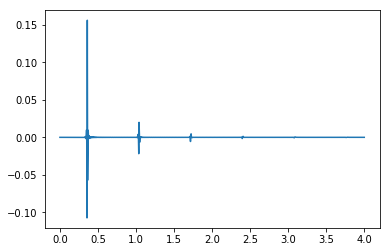

In [609]:
plt.plot(time,data)

## Apply Windowing function and compute fourier transform

In [610]:
#Define Window length:
wl = 126
#half window length
hwl = 62
bw =45  # bandwidth


In [611]:
# Create frequency array
f=np.arange(1,(wl/2))/wl*fs

# Define window roll along with 50% overlap of previous window
rollalong = np.int32(np.floor(wl * 0.5))

total_segments = np.int32(np.ceil(len(data) / np.float32(rollalong)))

# Define Window function
window = np.hanning(wl)  
 
# Pad data with zeroes
padded = np.concatenate((data, np.zeros(wl)))             

#Define storage arrays
result = np.empty((total_segments, wl), dtype=np.float32)   
windoww = np.empty((0, wl))

#Roll along trace applying window function and fft
for i in range(total_segments):                     
    currentroll = rollalong * i                     
    segment = padded[currentroll:currentroll+wl]       
    windoww = np.append(windoww,[segment], axis = 0)
    windowed = segment * window                       
    amp = np.fft.fft(windowed) / wl            
    amplitude = np.abs(amp)  
    result[i, :] = amplitude[:wl]               


##  Test for a single spectrum
#### With defined window over signal

101.03640819605083

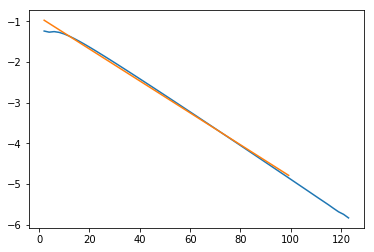

In [625]:
bwt = 50

x = f[0:bwt]

sww = 5
ratio =  np.log(result[8, :]/ result[3, :])

[p,c] =  np.polyfit(x,ratio[0:bwt],1)
yfit = c + p*x
plt.plot(f,ratio[0:hwl])
plt.plot(x,yfit[0:bwt])

t = (sww*wl*0.5)*dt
q = -1*np.pi*t/p
display(q)

# Automated Calculating spectral ratio, Gradient and Q

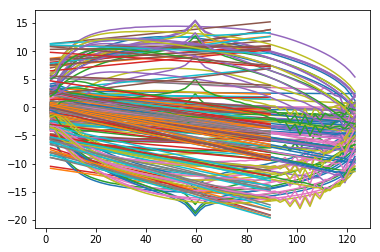

In [613]:
sq = []
ratio2 = []
t1 = []
res1 = []
upl =[]
lol = []
# Window spacing starts at 0
ws = 0
# Frequency bandwidth to fit data
x = f[0:bw]

for j in range(1,total_segments-ws):
    ws = j # windowspacing
    for i in range (0,total_segments-ws): 
        # calculate spectral ratio
        ratio =  np.log(result[i+ws, :]/ result[i, :])
        ratio2 = np.append(ratio2, [ratio])
        
        # least-squares fit to find gradient 
        [p,c] =  np.polyfit(x,ratio[0:bw],1)
        yfit = c + p*x
        
        # Calculate Residuals and save to array
        r = ratio[0:bw] -yfit
        res1 = np.append(res1,[r])
    
        # calculate time difference between windows and save to arry
        t = (ws*wl*0.5)*dt        
        t1 = np.append(t1,[t],axis = 0)
        # Calulate Q and save to array
        q = -1*np.pi*t/p
        sq = np.append(sq,[q],axis = 0)
        
        # Upper Window and save to array
        up = i+ws
        upl = np.append(upl,[up], axis = 0)       
        #Lower Window and save to array
        l = i
        lol = np.append(lol,[l])
        #PLot spectral ratios and best fit line
        plt.plot(f,ratio[0:hwl])
        plt.plot(x,yfit)

## QC methods?

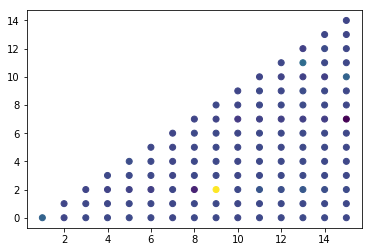

In [623]:
plt.scatter(upl,lol,c=sq)

#### Residual sum of squares/

In [614]:
ratio = np.reshape(ratio2,(len(sq), wl))

ress = np.split(res1,len(sq))
RSS = []
for l in range(0,len(sq)):
    rss = np.sum(np.square(ress[l]))
    RSS = np.append(RSS,[rss])

#### PLot of Q against residuals

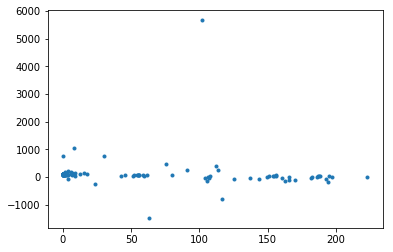

In [615]:
plt.plot(RSS,sq,'.')

###### (For noise free trace )Seems to show reasonable cluster of values around true Q values at low SSR - though may not be the best metric
###### (Noisy Trace shows no real correlation)

(0, 200)

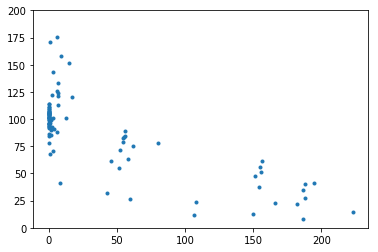

In [616]:
plt.plot(RSS,sq,'.')
plt.ylim(0,200)

## Analytic Signal

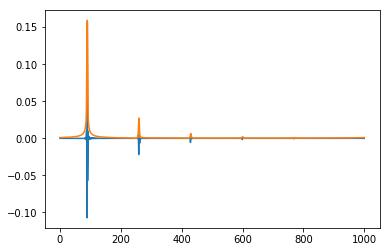

In [617]:
plt.plot(data)

analytical_signal = sp.hilbert(data)


amplitude_envelope = np.abs(analytical_signal)
plt.plot(amplitude_envelope)


## RMS of trace

In [618]:
RMS = np.empty((total_segments,1), dtype=np.float32)
for j in range(total_segments):
    rms = np.sum(np.square(windoww[j,:]))
    RMS[j] = rms

In [619]:
RMS

array([[3.9698914e-02],
       [3.9698996e-02],
       [2.0843635e-07],
       [1.0078505e-03],
       [1.0078509e-03],
       [5.7318444e-05],
       [5.7308353e-05],
       [1.8758337e-08],
       [6.5399663e-06],
       [6.5376171e-06],
       [5.3942864e-09],
       [1.2882022e-06],
       [1.2874826e-06],
       [1.1558799e-07],
       [1.5236921e-07],
       [3.8336044e-08]], dtype=float32)